In [1]:
from Advanced_Lane_Finding import *

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.signal import find_peaks_cwt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Demonstrate segmentation

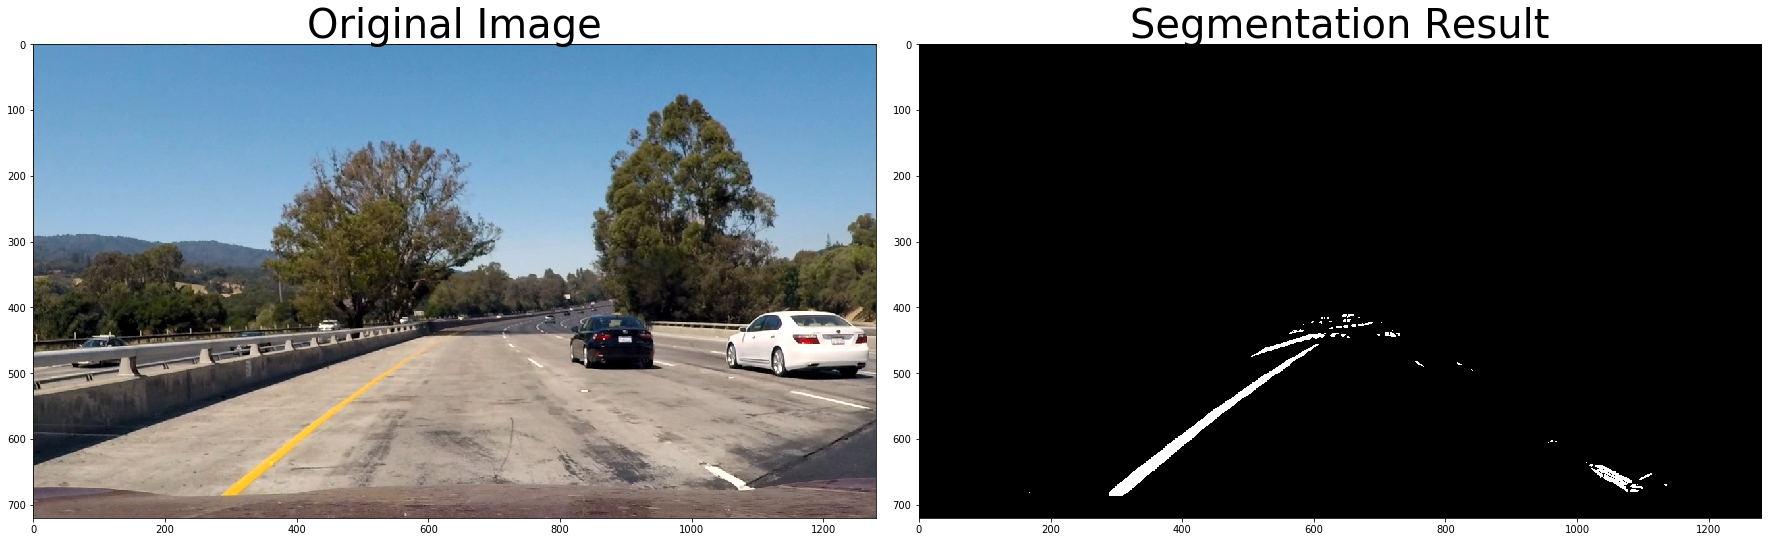

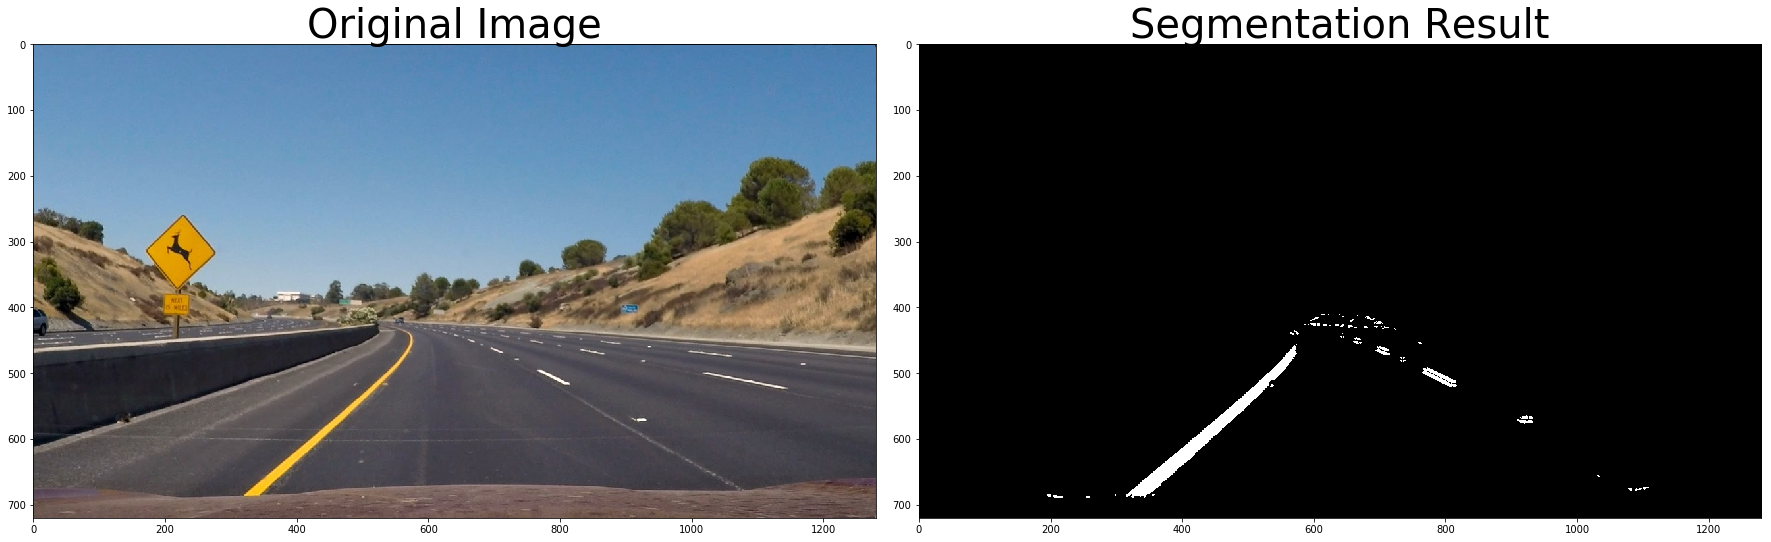

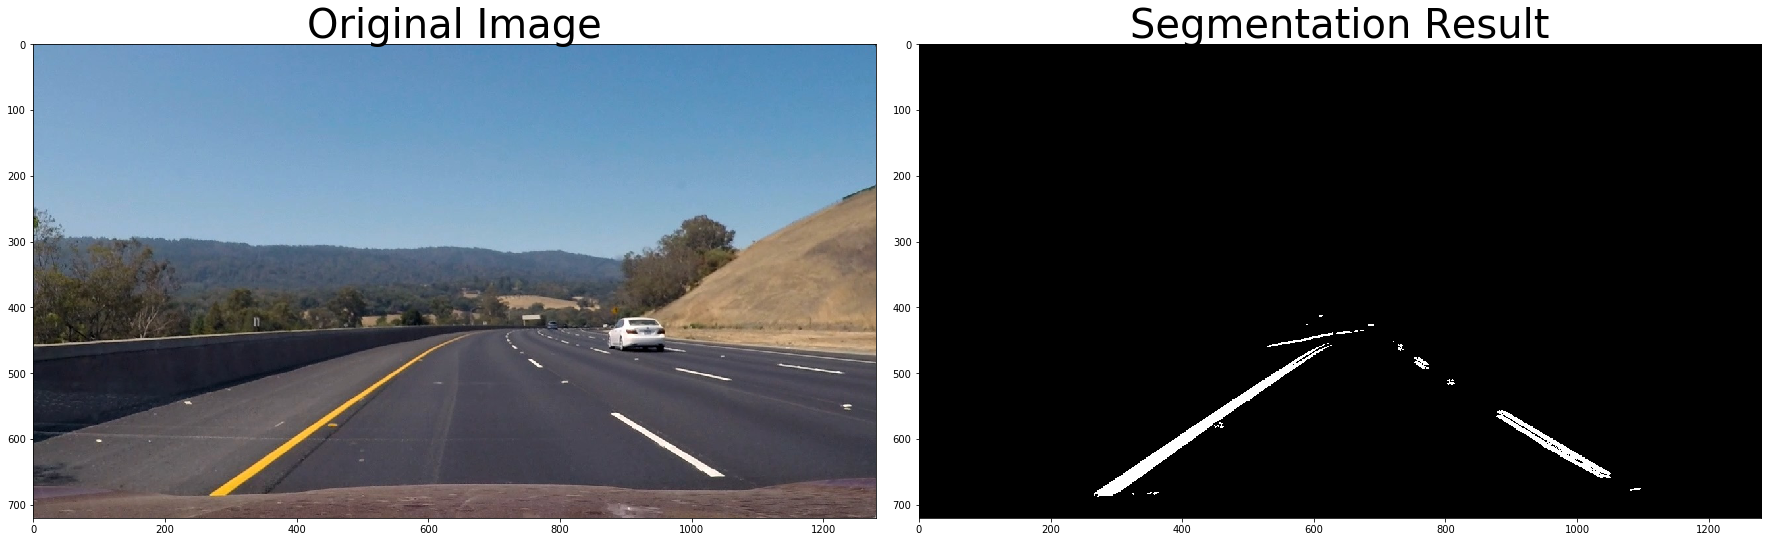

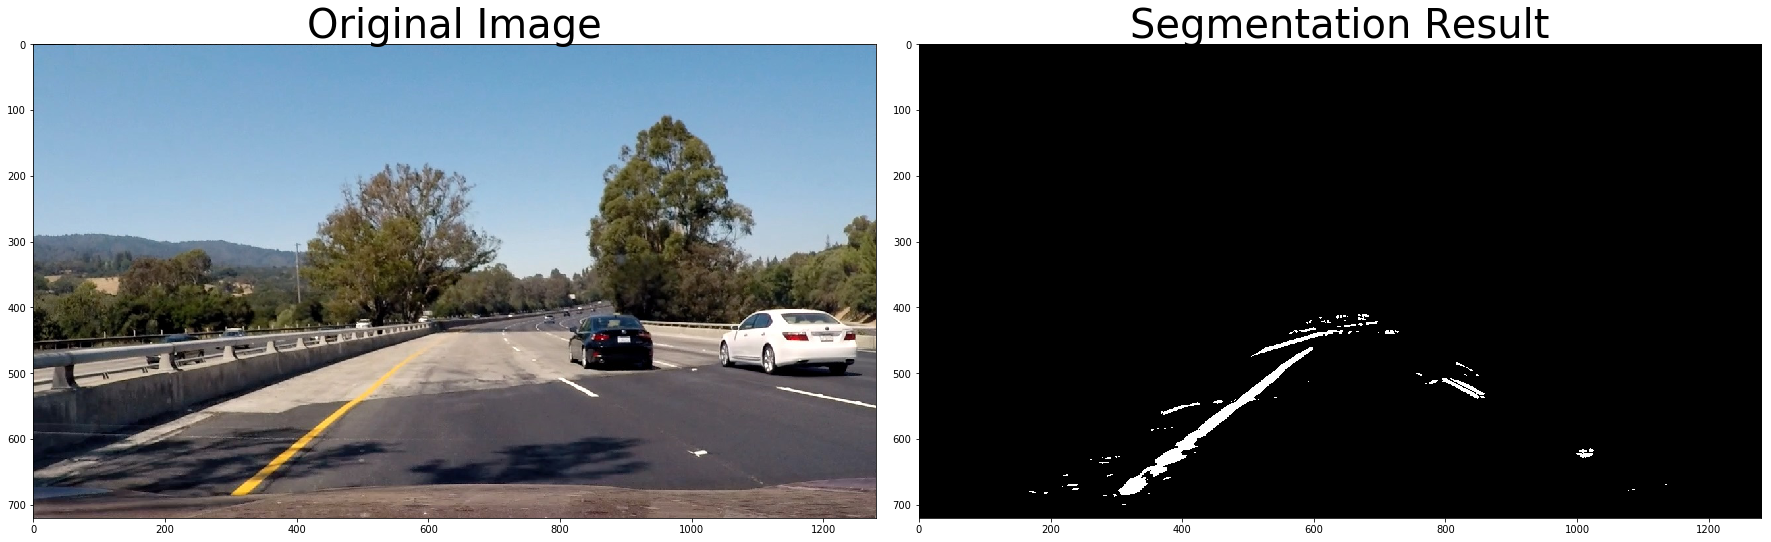

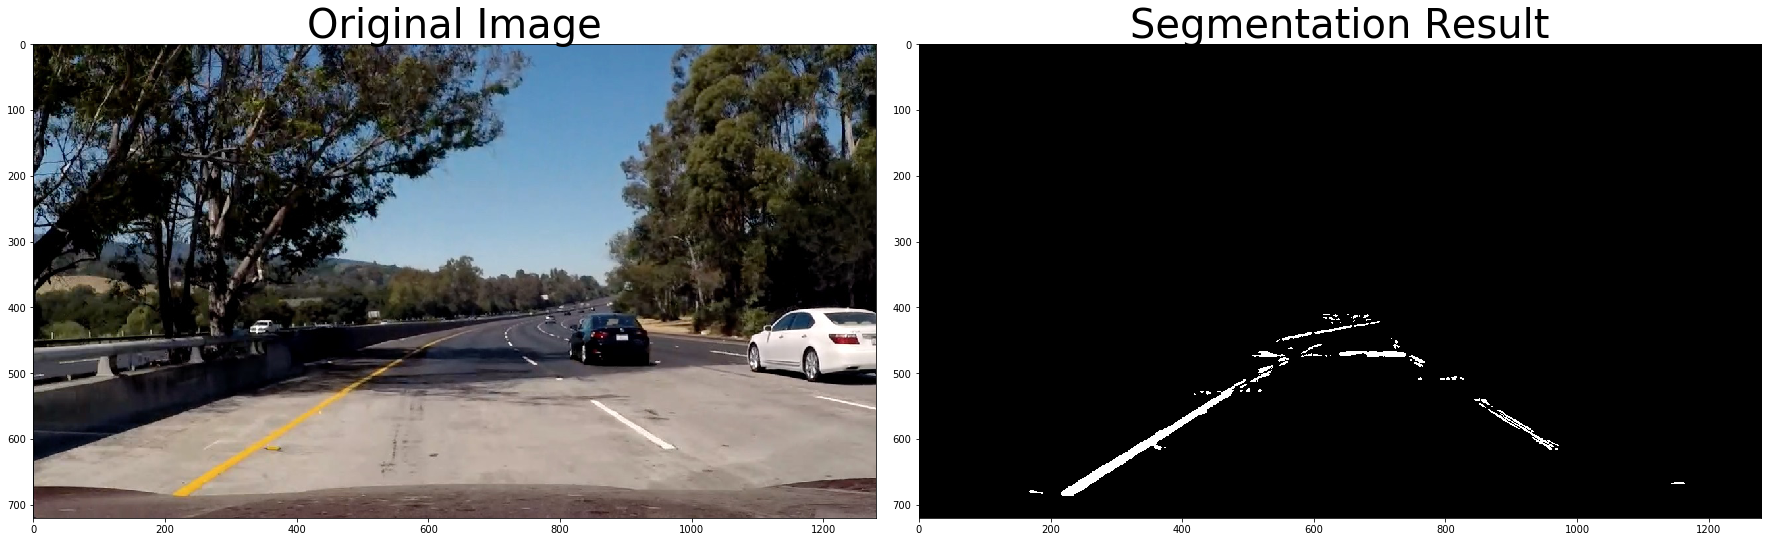

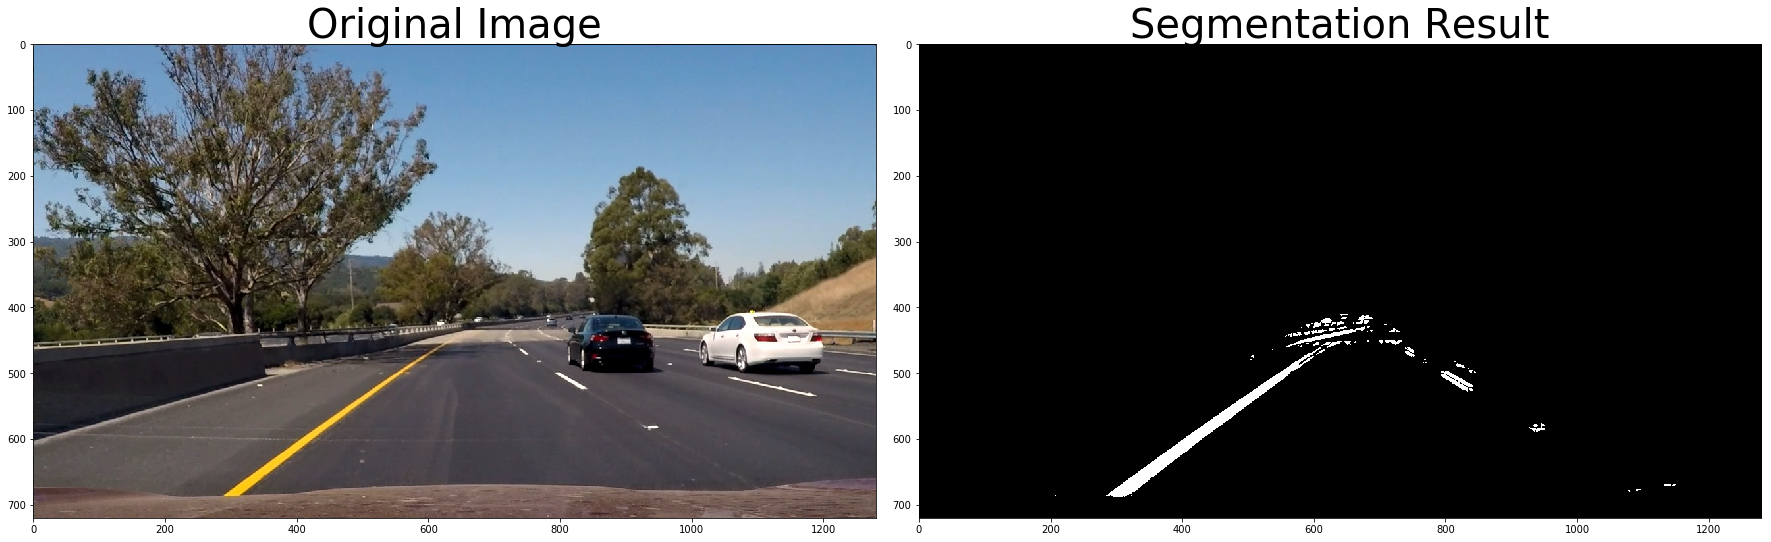

In [2]:
for i in range(1,7):
    fname = 'test_images/test{}.jpg'.format(i)
    image = mpimg.imread(fname)
    result = segment(image)

    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()

    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=40)

    ax2.imshow(result, cmap='gray')
    ax2.set_title('Segmentation Result', fontsize=40)
   
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    
plt.savefig('output_images/segmentation.png')

# Demo Undistort

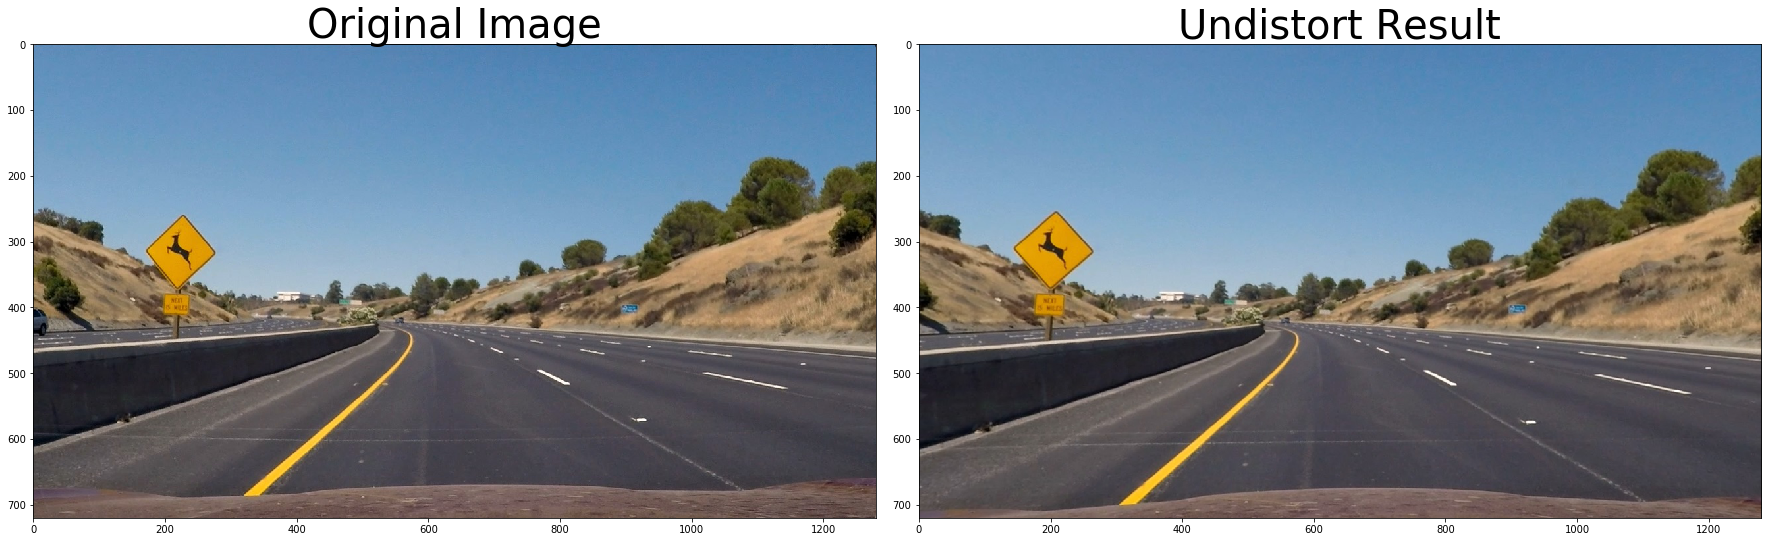

In [3]:
i=2
fname = 'test_images/test{}.jpg'.format(i)
image = mpimg.imread(fname)
result = undistort(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result, cmap='gray')
ax2.set_title('Undistort Result', fontsize=40)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    
plt.savefig('output_images/undistorted.png')


# Demo Bird's Eye View

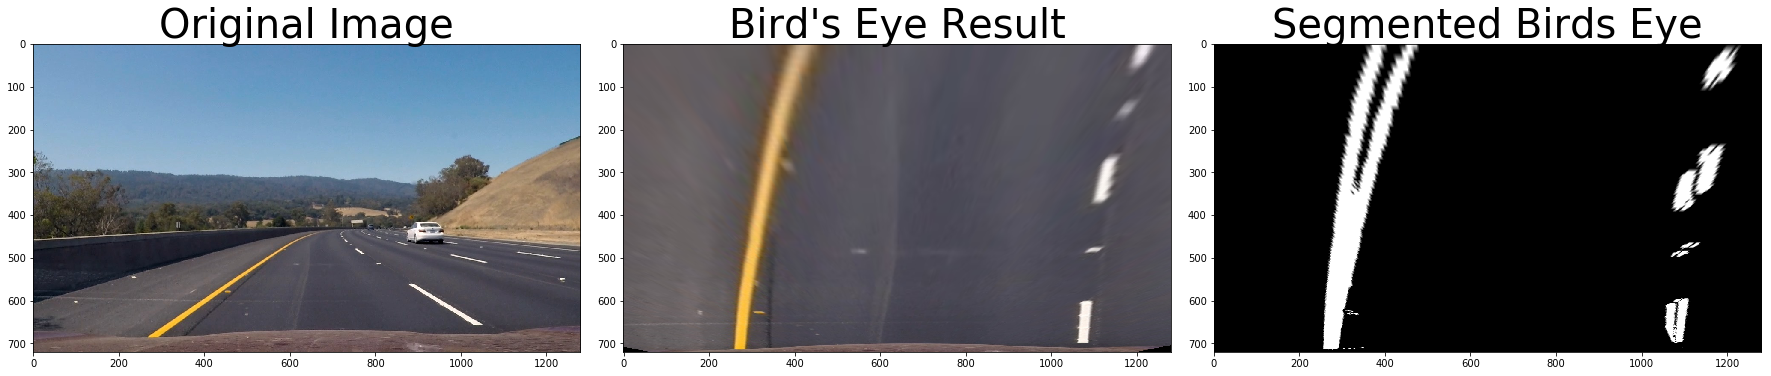

In [4]:
i=3
fname = 'test_images/test{}.jpg'.format(i)
image = mpimg.imread(fname)
und = undistort(image)
beye = corners_unwarp(und.copy())[0]
result = corners_unwarp(segment(und))[0]

# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(beye)
ax2.set_title('Bird\'s Eye Result', fontsize=40)


ax3.imshow(result, cmap='gray')
ax3.set_title('Segmented Birds Eye', fontsize=40)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


plt.savefig('output_images/beye.png')

# Demo Lane finder

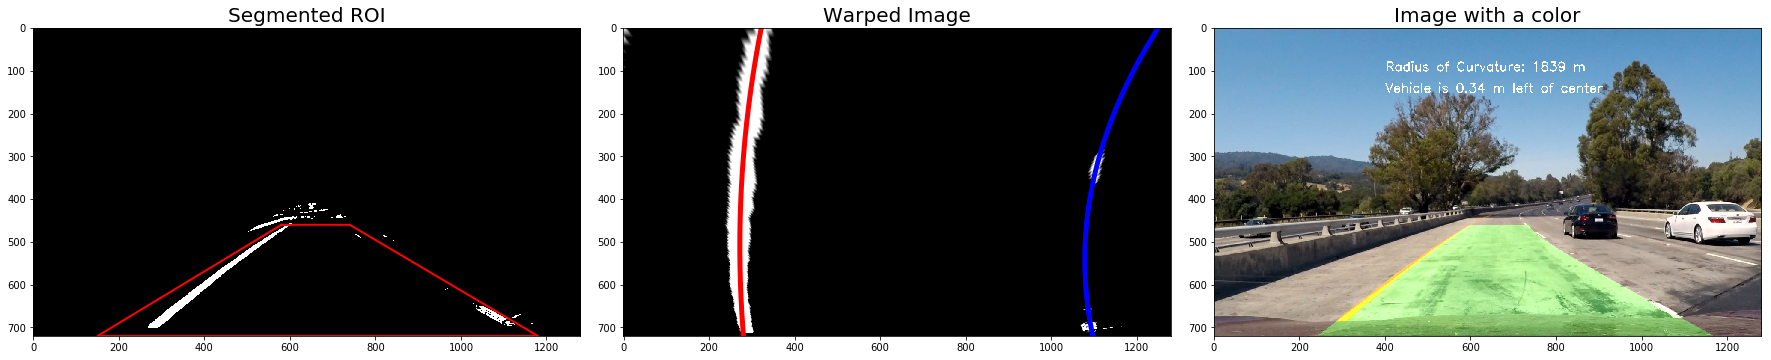

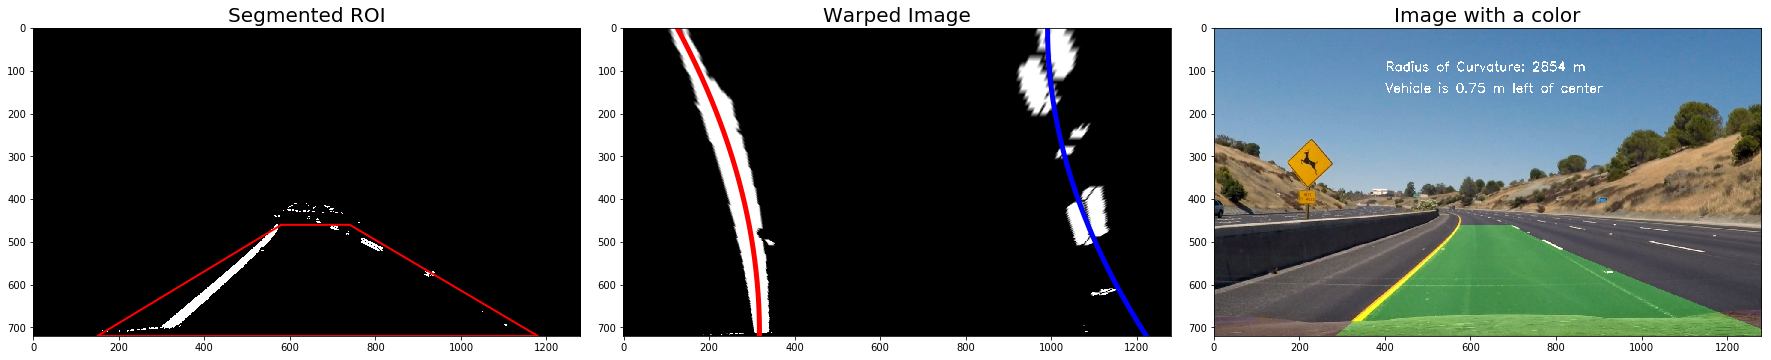

In [7]:

roi = [[150+430,460],[1180-440,460],[1180,720],[150,720]]

x_values = [roi[0][0],roi[1][0],roi[2][0],roi[3][0],roi[0][0]]
y_values = [roi[0][1],roi[1][1],roi[2][1],roi[3][1],roi[0][1]]

for i in range(1,3):
    
    LF = LaneFinder()

    fname = 'test_images/test{}.jpg'.format(i)
    img_raw = mpimg.imread(fname)
    # Apply pipeline to the image to create black and white image
    undist = undistort(img_raw)
    
    img = segment(undist)
    top_down, perspective_M, perspective_Minv = corners_unwarp(img)
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    
    ax1.set_title('Segmented ROI', fontsize=20)
    ax1.plot(x_values,y_values,'r-',lw=2)
    ax1.imshow(img, cmap='gray')
    
    y, xl, xr, _ = LF._fit_lanes(top_down)
    ax2.plot(xl, y, color='red', linewidth=5)
    ax2.plot(xr, y, color='blue', linewidth=5)
    ax2.imshow(top_down, cmap='gray')
    ax2.set_title('Warped Image', fontsize=20)

    image_color = LF.process_image(img_raw)
    ax3.imshow(image_color)
    ax3.set_title('Image with a color', fontsize=20)
    # Adjusting subplots
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

    plt.savefig('output_images/lane_finder.png')

In [8]:
## Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
# Set up lines for left and right
LF = LaneFinder()
output = 'output.mp4'
clip1 = VideoFileClip("project_video.mp4")

white_clip = clip1.fl_image(LF.process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video output.mp4
[MoviePy] Writing video output.mp4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [06:47<00:00,  3.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output.mp4 

Wall time: 6min 48s
